<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat2_GISA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import geopandas as gpd
from geopandas import GeoDataFrame,read_file
import matplotlib.pyplot as plt
import zipfile

In [30]:
filezip='Archive.zip'
with zipfile.ZipFile(filezip,'r') as namazip:
  shpfile=[f for f in namazip.namelist()
  if f.endswith('.shp') and not '__MACOSX/' in f and not '._' in f ]
print(shpfile)

['ADMINISTRASI_LN_50K.shp', 'ADMINISTRASIKECAMATAN_AR_50K.shp']


In [40]:
file={}
for shp in shpfile:
  gdf=gpd.read_file(f"zip://{filezip}!{shp}")
  file[shp]=gdf
print(file[shpfile[0]].head())

   KARKTR  ...                                           geometry
0       0  ...  LINESTRING Z (97.04647 5.24146 0, 97.04637 5.2...
1       0  ...  LINESTRING Z (97.14787 5.15211 0, 97.14798 5.1...
2       0  ...  LINESTRING Z (97.13359 5.17511 0, 97.13327 5.1...
3       0  ...  LINESTRING Z (97.11511 5.19866 0, 97.11497 5.1...
4       0  ...  LINESTRING Z (97.07916 5.15859 0, 97.07932 5.1...

[5 rows x 27 columns]


<Axes: >

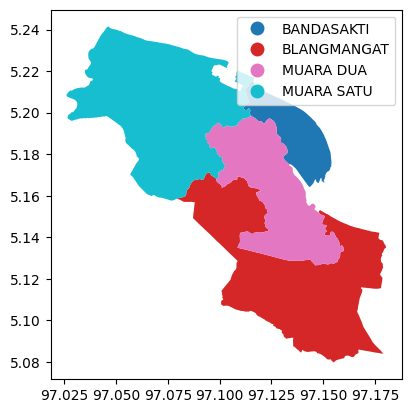

In [59]:
file['ADMINISTRASIKECAMATAN_AR_50K.shp'].plot(column='NAMOBJ',legend=True)

In [48]:
file['ADMINISTRASIKECAMATAN_AR_50K.shp'].head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0, 97.13327 5.175..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0, 97.09845 5.167..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0, 97.13349 5.175..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0, 97.11612 5.215..."


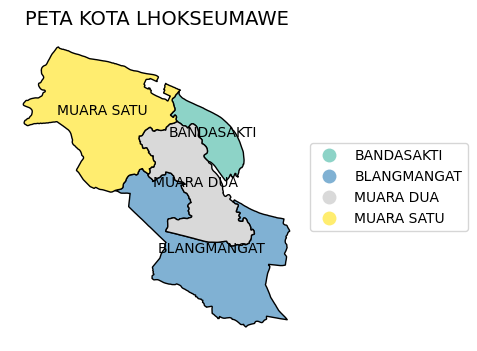

In [107]:
kec=file['ADMINISTRASIKECAMATAN_AR_50K.shp']
fix,ax=plt.subplots(figsize=(6,4))
kec.plot(column='NAMOBJ',legend=True,ax=ax, cmap='Set3', edgecolor='black',
         legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})
for idx,row in kec.iterrows():
  if row['geometry'].geom_type in ['Polygon','MultiPolygon']:
    plt.text(row['geometry'].centroid.x,
             row['geometry'].centroid.y,
             row['NAMOBJ'],
             fontsize=10,ha='center')
plt.title('PETA KOTA LHOKSEUMAWE', fontsize=14)
plt.axis('off')
plt.show()